In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

 make_blobs function to generate the coordinate pairs, and Matplotlib’s scatter function to plot them

In [3]:
from sklearn.datasets import make_blobs

In [4]:
points, cluster_indexes = make_blobs(n_samples=300, centers=4,
 cluster_std=0.8, random_state=0)

In [6]:
x= points[:,0] #all rows and first column
y=points[:,1] #all rows and second column

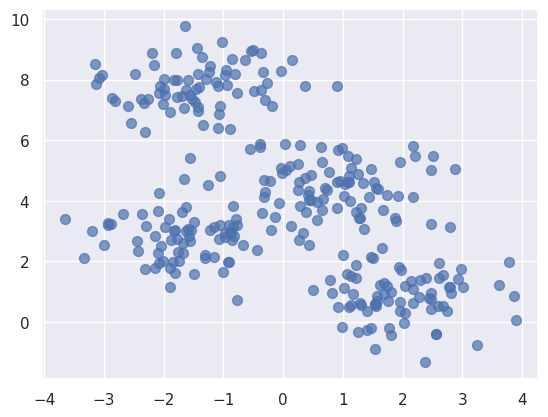

In [8]:
plt.scatter(x, y, s=50, alpha=0.7) #s=size of markers dot alpha=sets transparency of markers

Using KMeans g to divide the coordinate pairs into four groups. Then
render the cluster centroids in red and color-code the data points by cluster

In [9]:
from sklearn.cluster import KMeans

In [18]:
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)

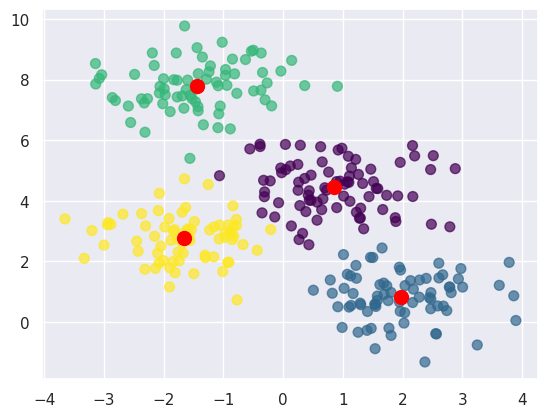

In [19]:
plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)

how do you know
what the right number of clusters is? The answer isn’t always obvious from looking at
a plot, and if the data has more than three dimensions, you can’t plot it anyway.
<br>
One way to pick the right number is with the elbow method, which plots inertias (the
sum of the squared distances of the data points to the closest cluster center) obtained
from KMeans.inertia_ as a function of cluster counts. Plot inertias this way and look
for the sharpest elbow in the curve:


Text(0, 0.5, 'Inertia')

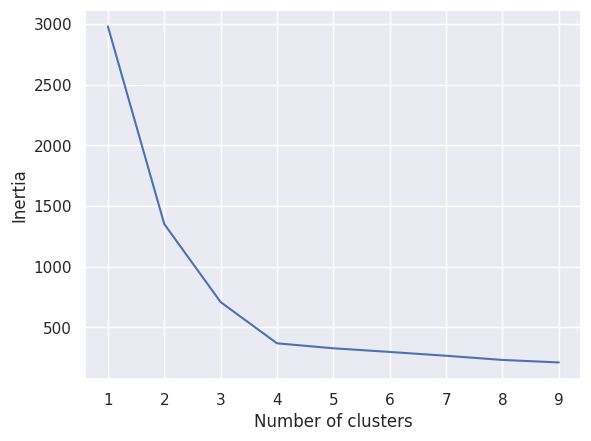

In [21]:
inertias = []
for i in range(1, 10):
 kmeans = KMeans(n_clusters=i, random_state=0)
 kmeans.fit(points)
 inertias.append(kmeans.inertia_)
plt.plot(range(1, 10), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
#In this example, it appears that 4 is the right number of clusters: